In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\6_week\diabetes\diabetes.csv"
df = pd.read_csv(file_path)

In [236]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [238]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [240]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [242]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: ylabel='count'>

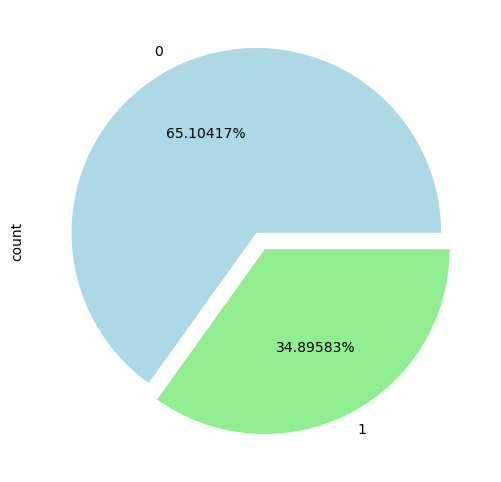

In [244]:
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
df['Outcome'].value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05))

In [246]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [248]:
X.shape, y.shape

((768, 8), (768,))

In [250]:
# 정규화 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [254]:
x_train = torch.tensor(X_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # 차원 추가
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # 차원 추가

In [258]:
train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(x_test,y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [260]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

In [262]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [264]:
model = DiabetesDense()

In [266]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [268]:
# loss, accuracy 기록
train_losses = []
test_accuracies = []

# 반복학습
num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Training mode
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_dataloader))
    print(f"Epoch {epoch + 1}, Loss: {train_losses[-1]:.4f}")

Epoch 1, Loss: 0.1909
Epoch 2, Loss: 0.1699
Epoch 3, Loss: 0.1573
Epoch 4, Loss: 0.1468
Epoch 5, Loss: 0.1491
Epoch 6, Loss: 0.1388
Epoch 7, Loss: 0.1412
Epoch 8, Loss: 0.1342
Epoch 9, Loss: 0.1336
Epoch 10, Loss: 0.1274
Epoch 11, Loss: 0.1276
Epoch 12, Loss: 0.1297
Epoch 13, Loss: 0.1301
Epoch 14, Loss: 0.1304
Epoch 15, Loss: 0.1264
Epoch 16, Loss: 0.1166
Epoch 17, Loss: 0.1124
Epoch 18, Loss: 0.1143
Epoch 19, Loss: 0.1138
Epoch 20, Loss: 0.1154
Epoch 21, Loss: 0.1044
Epoch 22, Loss: 0.1132
Epoch 23, Loss: 0.1142
Epoch 24, Loss: 0.1033
Epoch 25, Loss: 0.1006
Epoch 26, Loss: 0.0985
Epoch 27, Loss: 0.0964
Epoch 28, Loss: 0.0955
Epoch 29, Loss: 0.0962
Epoch 30, Loss: 0.0943


In [276]:
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())
mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 0.1909


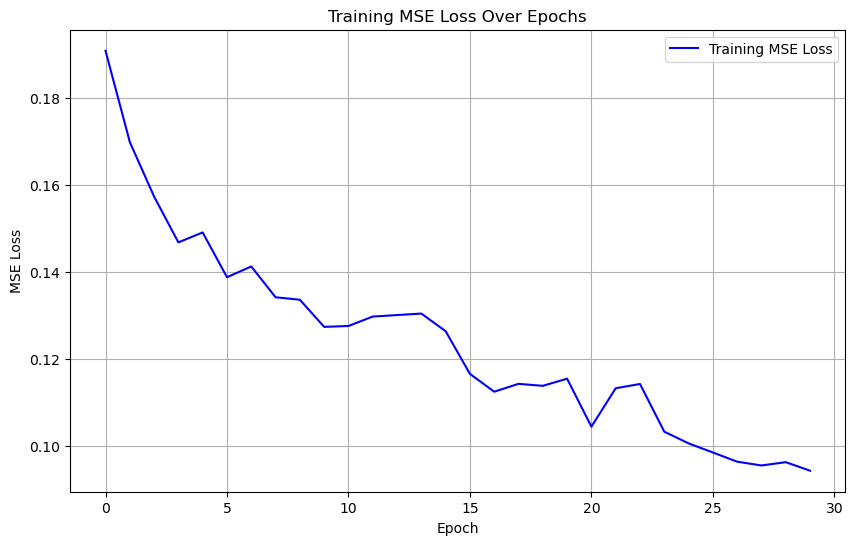

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training MSE Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training MSE Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()